In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 시계열 데이터 처리

In [3]:
dateStr = ["2019, 9 , 5", "2019, 9 , 6", "2019, 9 , 7", "2019, 9 , 8"]
idx = pd.to_datetime(dateStr)
# 문자열 -> datetime -> DatetimeIndex
idx

DatetimeIndex(['2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08'], dtype='datetime64[ns]', freq=None)

In [82]:
s=pd.Series(np.random.randn(4), index=idx)
s

2019-09-05    0.769771
2019-09-06   -0.276111
2019-09-07   -2.388168
2019-09-08   -0.000885
dtype: float64

In [4]:
pd.date_range("2019-9-5", "2019-9-30")

DatetimeIndex(['2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30'],
              dtype='datetime64[ns]', freq='D')

In [5]:
pd.date_range(start="2019-9-5", periods=30)

DatetimeIndex(['2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04'],
              dtype='datetime64[ns]', freq='D')

In [6]:
pd.date_range(start="2019-9-5", periods=30, freq="B")    # freq="B" : 평일에 해당하는 날짜만 출력

DatetimeIndex(['2019-09-05', '2019-09-06', '2019-09-09', '2019-09-10',
               '2019-09-11', '2019-09-12', '2019-09-13', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-23', '2019-09-24', '2019-09-25', '2019-09-26',
               '2019-09-27', '2019-09-30', '2019-10-01', '2019-10-02',
               '2019-10-03', '2019-10-04', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14',
               '2019-10-15', '2019-10-16'],
              dtype='datetime64[ns]', freq='B')

In [8]:
pd.date_range(start="2019-9-5", periods=30, freq="W")    # freq="W" : 주 단위로 출력

DatetimeIndex(['2019-09-08', '2019-09-15', '2019-09-22', '2019-09-29',
               '2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22',
               '2019-12-29', '2020-01-05', '2020-01-12', '2020-01-19',
               '2020-01-26', '2020-02-02', '2020-02-09', '2020-02-16',
               '2020-02-23', '2020-03-01', '2020-03-08', '2020-03-15',
               '2020-03-22', '2020-03-29'],
              dtype='datetime64[ns]', freq='W-SUN')

## SHIFT 연산

인덱스는 그대로 두고 데이터를 밀어내는(shift) 것

In [11]:
s = pd.Series(np.random.randn(5), index=pd.date_range("2019-9-5", periods=5))
s

2019-09-05   -0.166330
2019-09-06    1.106524
2019-09-07    0.831637
2019-09-08   -1.043707
2019-09-09    1.417435
Freq: D, dtype: float64

In [12]:
s.shift(1)    # 아래로 한 칸

2019-09-05         NaN
2019-09-06   -0.166330
2019-09-07    1.106524
2019-09-08    0.831637
2019-09-09   -1.043707
Freq: D, dtype: float64

In [13]:
s.shift(2)    # 아래로 두 칸

2019-09-05         NaN
2019-09-06         NaN
2019-09-07   -0.166330
2019-09-08    1.106524
2019-09-09    0.831637
Freq: D, dtype: float64

In [14]:
s.shift(-2)    # 위로 두 칸

2019-09-05    0.831637
2019-09-06   -1.043707
2019-09-07    1.417435
2019-09-08         NaN
2019-09-09         NaN
Freq: D, dtype: float64

## Resample 함수


리샘플링: 시간 구간을 재조정
* 업샘플링(데이터 양 증가) - 시간 구간이 작아질 때
* 다운샘플링(데이터 양 감소) - 시간 구간이 커질 때

In [15]:
s2 = pd.Series(np.random.randn(100), index=pd.date_range("2019-9-5", periods=100))
s2

2019-09-05   -3.727463
2019-09-06    0.061993
2019-09-07   -0.952493
2019-09-08    0.336168
2019-09-09    0.332571
2019-09-10   -2.620104
2019-09-11    0.601451
2019-09-12    0.614818
2019-09-13   -1.640688
2019-09-14   -0.862396
2019-09-15   -0.703038
2019-09-16    0.945996
2019-09-17    0.307768
2019-09-18    0.594162
2019-09-19   -0.962195
2019-09-20   -2.146946
2019-09-21    0.252960
2019-09-22    1.444605
2019-09-23   -0.262011
2019-09-24    0.429576
2019-09-25   -0.665162
2019-09-26   -0.027157
2019-09-27   -0.226204
2019-09-28   -0.928654
2019-09-29   -0.848203
2019-09-30    0.665188
2019-10-01    0.477305
2019-10-02    1.353630
2019-10-03    0.322380
2019-10-04   -0.346725
                ...   
2019-11-14   -0.774439
2019-11-15    0.962792
2019-11-16   -0.263997
2019-11-17    2.223474
2019-11-18   -0.413175
2019-11-19   -1.102939
2019-11-20    1.087962
2019-11-21   -0.269614
2019-11-22    0.857304
2019-11-23   -0.380755
2019-11-24   -0.168102
2019-11-25   -1.299333
2019-11-26 

In [16]:
s2.resample("W")    # 주 단위로 만들어라

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [17]:
s2.resample("W").mean()

2019-09-08   -1.070449
2019-09-15   -0.611055
2019-09-22    0.062336
2019-09-29   -0.361116
2019-10-06    0.332842
2019-10-13    0.051428
2019-10-20   -0.182225
2019-10-27    0.410901
2019-11-03   -0.819206
2019-11-10   -0.356200
2019-11-17    0.260602
2019-11-24   -0.055617
2019-12-01   -0.549824
2019-12-08    0.054787
2019-12-15   -0.857369
Freq: W-SUN, dtype: float64

In [18]:
s2.resample("M").first()

2019-09-30   -3.727463
2019-10-31    0.477305
2019-11-30   -1.354503
2019-12-31    0.974060
Freq: M, dtype: float64

# 실습: 시계열 데이터 처리

In [27]:
df = pd.read_csv("/content/drive/My Drive/190000 멀티캠퍼스/Data/household_power_consumption.txt", sep=";", parse_dates={"dt": ["Date", "Time"]}, na_values=["nan", "?"], low_memory=False, index_col="dt")
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


## 데이터 살펴보기

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [28]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [29]:
df.shape

(2075259, 7)

In [30]:
df.describe()    # 기술통계

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [31]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## 데이터 시각화

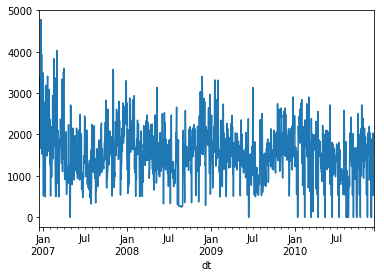

In [37]:
df.Global_active_power.resample("D").sum().plot()    # 하루동안의 전력 소비량 합계

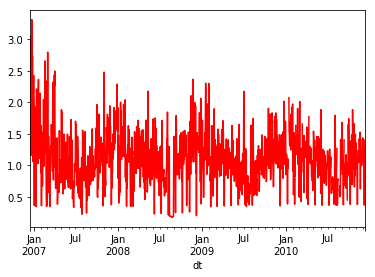

In [38]:
df.Global_active_power.resample("D").mean().plot(color="red")

### 플롯 두개를 위아래로 나란히 보고싶다

In [39]:
r = df.Global_intensity.resample("D").agg(["mean", "std"])
r

,mean,std
dt,,
2006-12-16,13.082828,4.283262
2006-12-17,9.999028,5.031445
2006-12-18,6.421667,4.248511
2006-12-19,4.926389,5.238010
2006-12-20,6.467361,5.556587
2006-12-21,5.033797,4.209510
2006-12-22,6.872917,6.080840
2006-12-23,14.028056,6.194776
2006-12-24,7.640417,5.324093


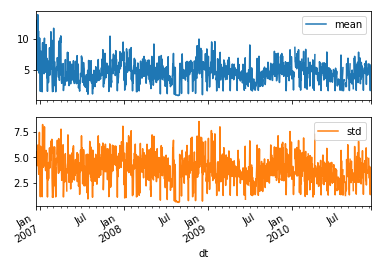

In [44]:
r.plot(subplots=True)
plt.show()

### 월 단위로 보고싶다

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

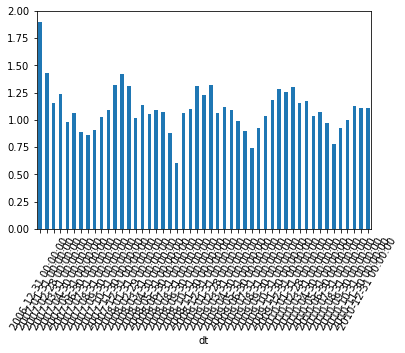

In [46]:
df["Global_active_power"].resample("M").mean().plot(kind="bar")
plt.xticks(rotation=60)

### 4분기로 나누어서 분기별로 보고싶다

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

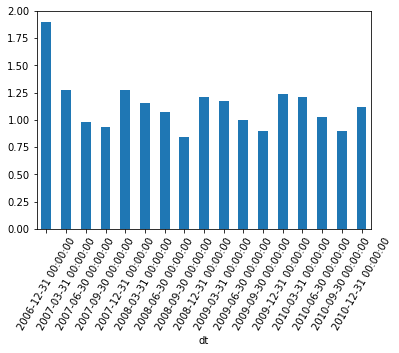

In [47]:
df["Global_active_power"].resample("Q").mean().plot(kind="bar")
plt.xticks(rotation=60)

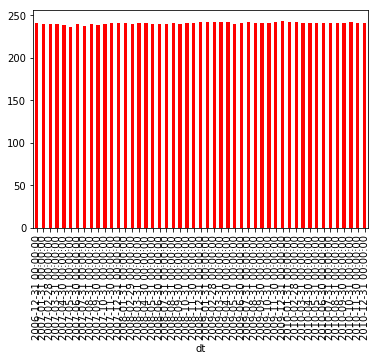

In [48]:
df["Voltage"].resample("M").mean().plot(kind="bar", color="red")

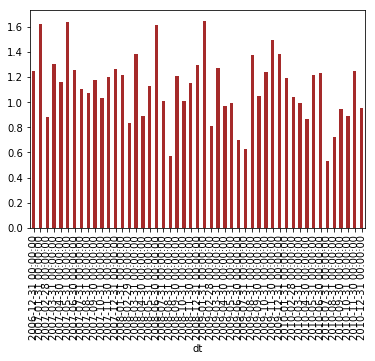

In [49]:
df["Sub_metering_1"].resample("M").mean().plot(kind="bar", color="brown")

In [52]:
cols = [0, 1, 2, 3, 4, 5, 6]
values = df.resample("D").mean().values
values

array([[3.05347475e+00, 8.81868687e-02, 2.36243763e+02, ...,
        0.00000000e+00, 1.37878788e+00, 1.24393939e+01],
       [2.35448611e+00, 1.56948611e-01, 2.40087028e+02, ...,
        1.41180556e+00, 2.90763889e+00, 9.26458333e+00],
       [1.53043472e+00, 1.12355556e-01, 2.41231694e+02, ...,
        7.38194444e-01, 1.82013889e+00, 9.73472222e+00],
       ...,
       [1.11950833e+00, 1.39831944e-01, 2.41619722e+02, ...,
        1.25347222e+00, 1.44444444e+00, 6.17430556e+00],
       [1.09700833e+00, 1.18241667e-01, 2.40260674e+02, ...,
        7.66666667e-01, 5.41666667e-01, 6.81388889e+00],
       [1.27557083e+00, 1.04961111e-01, 2.38837896e+02, ...,
        1.42638889e+00, 3.39583333e-01, 7.15833333e+00]])

In [53]:
values.shape

(1457, 7)

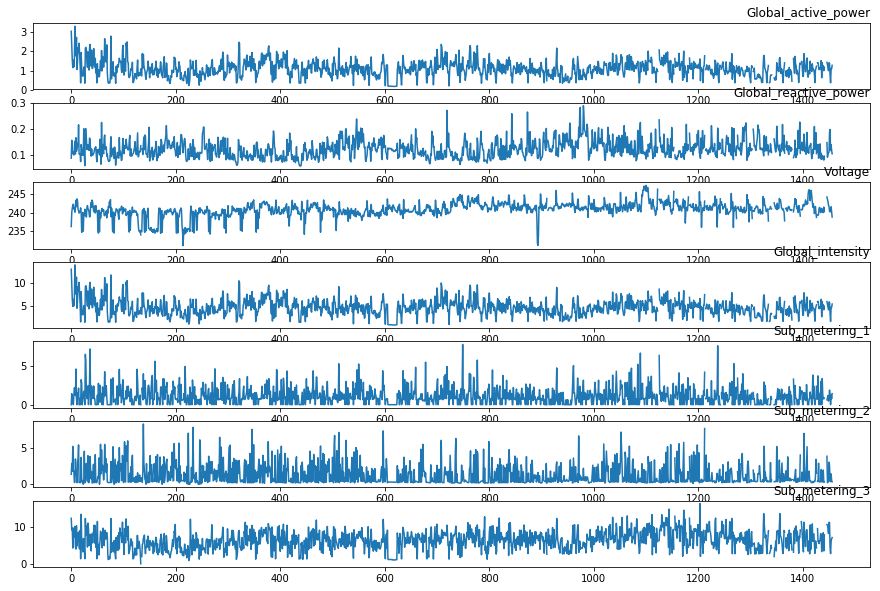

In [55]:
groups = cols

i=1
plt.figure(figsize=(15,10))

for group in groups:
  plt.subplot(len(cols), 1, i)
  plt.title(df.columns[group], loc="right")
  plt.plot(values[:, group])
  i += 1

plt.show()

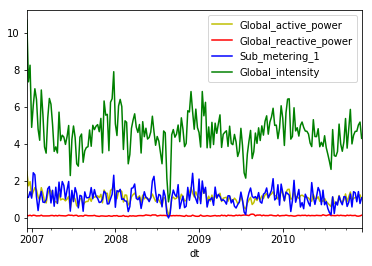

In [59]:
df.Global_active_power.resample("W").mean().plot(color="y", legend=True)
df.Global_reactive_power.resample("W").mean().plot(color="r", legend=True)
df.Sub_metering_1.resample("W").mean().plot(color="b", legend=True)
df.Global_intensity.resample("W").mean().plot(color="g", legend=True)
plt.show()

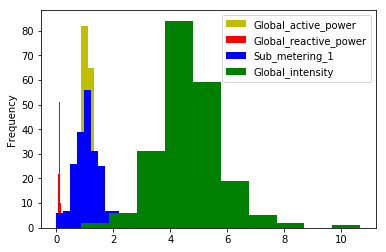

In [60]:
df.Global_active_power.resample("W").mean().plot(kind="hist", color="y", legend=True)
df.Global_reactive_power.resample("W").mean().plot(kind="hist", color="r", legend=True)
df.Sub_metering_1.resample("W").mean().plot(kind="hist", color="b", legend=True)
df.Global_intensity.resample("W").mean().plot(kind="hist", color="g", legend=True)
plt.show()

In [61]:
data_returns = df.pct_change()    # pct_change: 퍼센트 변화율을 계산해주는 함수
data_returns.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-16 17:25:00,0.271347,0.043062,-0.005152,0.250000,NaN,0.0,-0.058824
2006-12-16 17:26:00,0.002612,0.142202,-0.001455,0.000000,NaN,1.0,0.062500
2006-12-16 17:27:00,0.002605,0.008032,0.001929,0.000000,NaN,-0.5,0.000000
2006-12-16 17:28:00,-0.319599,0.051793,0.008300,-0.313043,NaN,0.0,0.000000


In [62]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


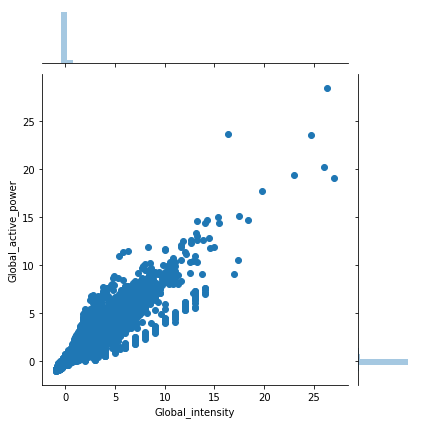

In [64]:
sns.jointplot(x="Global_intensity", y="Global_active_power", data=data_returns)
plt.show()

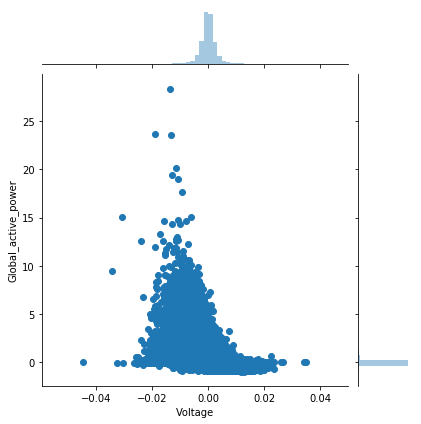

In [65]:
sns.jointplot(x="Voltage", y="Global_active_power", data=data_returns)
plt.show()

In [66]:
df.corr(method="spearman")

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.269329,-0.325213,0.995372,0.335149,0.186016,0.603609
Global_reactive_power,0.269329,1.000000,-0.094443,0.297814,0.117254,0.432778,0.071743
Voltage,-0.325213,-0.094443,1.000000,-0.349364,-0.182835,-0.093046,-0.183980
Global_intensity,0.995372,0.297814,-0.349364,1.000000,0.336599,0.200708,0.600211
Sub_metering_1,0.335149,0.117254,-0.182835,0.336599,1.000000,0.056410,0.148258
Sub_metering_2,0.186016,0.432778,-0.093046,0.200708,0.056410,1.000000,0.044187
Sub_metering_3,0.603609,0.071743,-0.183980,0.600211,0.148258,0.044187,1.000000


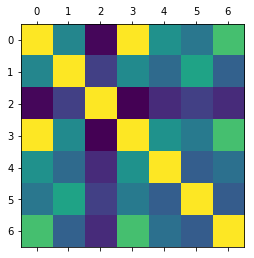

In [67]:
plt.matshow(df.corr(method="spearman"))
plt.show()

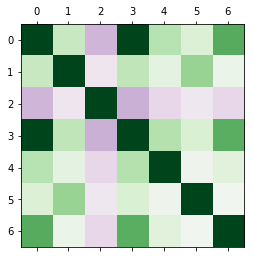

In [68]:
plt.matshow(df.corr(method="spearman"), vmax=1, vmin=-1, cmap="PRGn")
plt.show()

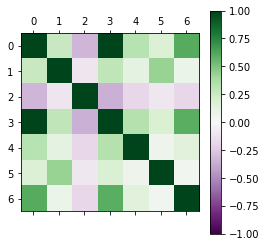

In [69]:
plt.matshow(df.corr(method="spearman"), vmax=1, vmin=-1, cmap="PRGn")
plt.colorbar()
plt.show()

In [70]:
drop_list_all = []

for j in range(0,7):
  if not df.iloc[:, j].notnull().all():    # = null이 있으면    # all(): 모두 참이어야 참
    drop_list_all.append(j)

drop_list_all

[0, 1, 2, 3, 4, 5, 6]

In [71]:
df.isnull().sum()    # 25979개의 행이 null

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [0]:
# null값 처리

for j in range(0,7):
  df.iloc[:, j] = df.iloc[:, j].fillna(df.iloc[:,j].mean())    # 특정 열의 null값을 해당 열의 평균값으로 채워넣은 후 저장

In [73]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [74]:
df_resample = df.resample("h").mean()    # 시 단위로 리샘플
df_resample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.000000,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.000000,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.000000,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.000000,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.000000,0.416667,17.216667
2006-12-16 22:00:00,2.200133,0.056167,238.760000,9.523333,0.000000,0.133333,4.433333
2006-12-16 23:00:00,2.061600,0.071433,240.619667,8.896667,0.000000,0.083333,0.000000
2006-12-17 00:00:00,1.882467,0.102433,240.961833,8.126667,0.000000,0.466667,0.000000
2006-12-17 01:00:00,3.349400,0.136933,240.448333,14.246667,0.000000,25.233333,0.000000


In [75]:
df_resample.shape

(34951, 7)

In [76]:
values = df_resample.values
values

array([[4.22288889e+00, 2.29000000e-01, 2.34643889e+02, ...,
        0.00000000e+00, 5.27777778e-01, 1.68611111e+01],
       [3.63220000e+00, 8.00333333e-02, 2.34580167e+02, ...,
        0.00000000e+00, 6.71666667e+00, 1.68666667e+01],
       [3.40023333e+00, 8.52333333e-02, 2.33232500e+02, ...,
        0.00000000e+00, 1.43333333e+00, 1.66833333e+01],
       ...,
       [1.11490000e+00, 8.58000000e-02, 2.36543667e+02, ...,
        8.55000000e+00, 4.50000000e-01, 0.00000000e+00],
       [3.20533333e-01, 7.62333333e-02, 2.40140667e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.39866667e-01, 4.97666667e-02, 2.43371500e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [0]:
from sklearn.preprocessing import *
from sklearn.model_selection import *

In [81]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)
scaled

array([[0.63681623, 0.29573827, 0.33794529, ..., 0.        , 0.01136636,
        0.78241815],
       [0.54504495, 0.10335773, 0.33550078, ..., 0.        , 0.14465183,
        0.78267595],
       [0.50900588, 0.11007318, 0.28380167, ..., 0.        , 0.03086863,
        0.7741686 ],
       ...,
       [0.15394933, 0.11080499, 0.41082446, ..., 0.17677464, 0.00969131,
        0.        ],
       [0.03053403, 0.09845028, 0.54881238, ..., 0.        , 0.        ,
        0.        ],
       [0.08014666, 0.06427034, 0.67275343, ..., 0.        , 0.        ,
        0.        ]])

## 실습

목표: Global_active_power 예측

평가방법: rmse
* from sklearn.metrics import mean_squared_error
* rmse = np.sqrt(mean_squared_error(실제값, 예측값))


In [117]:
scaled.shape

(34951, 7)

In [0]:
xdata = scaled[:, 1:]
ydata = scaled[:, 0]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.2)

In [0]:
ytrain = ytrain.reshape((-1, 1))
ytest = ytest.reshape((-1, 1))

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
learning_rate = 0.1

In [0]:
x = tf.placeholder(tf.float32, [None, 6])
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_normal([6, 1]))
b = tf.Variable(tf.random_normal([1]))

hf = tf.add(tf.matmul(x, w), b)
cost = tf.math.sqrt(tf.reduce_mean(tf.pow(y - hf, 2)))
train = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [155]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(1001):
    _, cv = sess.run([train, cost], feed_dict={x:xtrain, y:ytrain})
    if step % 20 == 0:
      print("step: {}, cost: {}".format(step, cv))

step: 0, cost: nan
step: 20, cost: nan
step: 40, cost: nan
step: 60, cost: nan
step: 80, cost: nan
step: 100, cost: nan
step: 120, cost: nan
step: 140, cost: nan
step: 160, cost: nan
step: 180, cost: nan
step: 200, cost: nan
step: 220, cost: nan
step: 240, cost: nan
step: 260, cost: nan
step: 280, cost: nan
step: 300, cost: nan
step: 320, cost: nan
step: 340, cost: nan
step: 360, cost: nan
step: 380, cost: nan
step: 400, cost: nan
step: 420, cost: nan
step: 440, cost: nan
step: 460, cost: nan
step: 480, cost: nan
step: 500, cost: nan
step: 520, cost: nan
step: 540, cost: nan
step: 560, cost: nan
step: 580, cost: nan
step: 600, cost: nan
step: 620, cost: nan
step: 640, cost: nan
step: 660, cost: nan
step: 680, cost: nan
step: 700, cost: nan
step: 720, cost: nan
step: 740, cost: nan
step: 760, cost: nan
step: 780, cost: nan
step: 800, cost: nan
step: 820, cost: nan
step: 840, cost: nan
step: 860, cost: nan
step: 880, cost: nan
step: 900, cost: nan
step: 920, cost: nan
step: 940, cost: na

In [0]:
######################################## 망함 ##################################################

# Auto Encoder

지도학습: 정답이 있는 학습

비지도학습: 입력 데이터로부터 특징을 찾는 학습 (clustering, k-means 등)

**auto encoder**: 비지도학습에서 주로 사용하는 구조. 출력값을 입력값에 근사하도록 하는 함수를 만드는 알고리즘.
* encoder: 입력값에 대한 특징을 추출
* decoder: 원본 데이터 (입력 데이터) 를 재구성

auto encoder의 특징 = 은닉층이 입력층보다 node 갯수가 작다
* 데이터를 압축하는 효과
* 노이즈 제거 효과

auto encoder의 학습 과정
1. 입력값과 은닉층 사이의 가중치를 계산해서 sigmoid를 통과시킨다.
2. 1번의 결과와 출력층의 가중치를 계산하여 sigmoid를 통과시킨다.
3. 2번의 결과값을 이용해서 MSE(mean square error)를 구한다.
4. 3번의 결과로 얻어진 loss를 SGD로 최적화 시킨다.
5. 오류 역전파를 수행해서 가중치를 갱신한다.



# MNIST로 Auto Encoder 구현

mnist: 입력(784) -> 은닉(256) -> 출력(784)

In [98]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [0]:
# 파라미터 값 설정

learning_rate = 0.01
training_epoch = 20
batch_size = 100

# 신경망

n_hidden = 256    # 은닉층 유닛(뉴런) 개수
n_input = 28*28    # 입력 데이터 크기

In [0]:
# 신경망 layer 구성

x = tf.placeholder(tf.float32, [None, n_input])
# auto encoder에서는 y가 없다!

## Encoder, Decoder

input -> encode -> decode -> output

In [0]:
# 인코더 정의

w_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(x, w_encode), b_encode))

In [0]:
# 디코더 정의

w_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, w_decode), b_decode))

은닉층의 units는 입력층의 특징을 표현

In [0]:
cost = tf.reduce_mean(tf.pow(x - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

## 신경망 모델 학습

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [105]:
mnist.train.num_examples

55000

In [0]:
total_batch = int(mnist.train.num_examples / batch_size)    # 550 = 55000/100

In [109]:
for epoch in range(training_epoch):
  total_cost = 0
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    _, cv = sess.run([optimizer, cost], feed_dict={x:batch_xs})
    total_cost += cv
  print("epoch: ", "%04d" % (epoch+1), "avg cost = {:.4f}".format(total_cost/total_batch))
print("모델 완성")

epoch:  0001 avg cost = 0.1929
epoch:  0002 avg cost = 0.0536
epoch:  0003 avg cost = 0.0443
epoch:  0004 avg cost = 0.0406
epoch:  0005 avg cost = 0.0372
epoch:  0006 avg cost = 0.0342
epoch:  0007 avg cost = 0.0314
epoch:  0008 avg cost = 0.0304
epoch:  0009 avg cost = 0.0296
epoch:  0010 avg cost = 0.0293
epoch:  0011 avg cost = 0.0287
epoch:  0012 avg cost = 0.0283
epoch:  0013 avg cost = 0.0280
epoch:  0014 avg cost = 0.0279
epoch:  0015 avg cost = 0.0277
epoch:  0016 avg cost = 0.0274
epoch:  0017 avg cost = 0.0273
epoch:  0018 avg cost = 0.0272
epoch:  0019 avg cost = 0.0271
epoch:  0020 avg cost = 0.0270
모델 완성


## 입력값과 모델에서 생성한 값을 비교

In [0]:
sample_size = 10
samples = sess.run(decoder, feed_dict={x:mnist.test.images[:sample_size]})

In [115]:
print(mnist.test.images[0].shape)    # (784,)    # 그러므로 모양을 보려면 28*28로 reshape 해줘야 한다
print(mnist.test.images[0])

(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

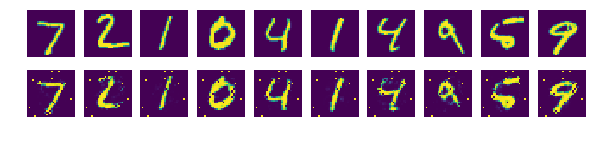

In [116]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size,2))
for i in range(sample_size):
  ax[0][i].set_axis_off()    # 첫번째 행의 상자들 테두리랑 축 등등 없애기
  ax[1][i].set_axis_off()    # 두번째 행의 상자들 테두리랑 축 등등 없애기
  # np.reshape(mnist.test.images[i], (28,28))    # 784 -> 28*28
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))    # 입력 이미지
  ax[1][i].imshow(np.reshape(samples[i], (28,28)))    # 모델 생성 이미지

# Sequence-to-Sequence (seq2seq)

seq2seq: 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 모델
* 입력을 받는 RNN + 출력하는 신경망 

기본 구조: 입력 -> 인코더 -> **컨텍스트 벡터** -> 디코더 -> 출력